In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df = pd.read_csv("fhv_data_fixed.csv", index_col=[0])
df.head()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,...,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,pu_zone,pu_borough,do_zone,do_borough,rideshare_company,perct_of_base_fare
0,2020-02-16 23:01:13,2020-02-16 23:09:07,2020-02-16 23:11:35,2020-02-16 23:17:25,1.52,350,5.04,0.00,0.13,0.45,...,Y,,N,N,Heartland Village/Todt Hill,Staten Island,South Beach/Dongan Hills,Staten Island,Uber,0.61
1,2020-03-01 23:32:52,2020-03-01 23:34:55,2020-03-01 23:36:12,2020-03-01 23:38:31,0.45,139,7.19,0.00,0.18,0.64,...,N,,N,N,Times Sq/Theatre District,Manhattan,Clinton East,Manhattan,Uber,0.78
2,2020-05-20 18:35:47,2020-05-20 18:36:48,2020-05-20 18:38:30,2020-05-20 18:43:52,0.79,322,7.33,0.00,0.18,0.65,...,N,,N,N,Canarsie,Brooklyn,Canarsie,Brooklyn,Uber,0.74
3,2020-05-24 00:53:55,2020-05-24 00:56:19,2020-05-24 00:59:25,2020-05-24 01:10:48,3.81,683,16.51,0.00,0.41,1.47,...,N,,N,N,West Concourse,Bronx,Central Park,Manhattan,Uber,0.60
4,2020-05-22 18:24:16,2020-05-22 18:25:30,2020-05-22 18:27:42,2020-05-22 18:35:40,1.45,478,9.41,0.00,0.24,0.84,...,N,,N,N,Mount Hope,Bronx,East Concourse/Concourse Village,Bronx,Uber,0.59


In [4]:
# Convert objects to datetimes
df["request_datetime"] = pd.to_datetime(df["request_datetime"], format="mixed", errors="coerce")
df["on_scene_datetime"] = pd.to_datetime(df["on_scene_datetime"], format="mixed", errors="coerce")
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], format="mixed", errors="coerce")
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"], format="mixed", errors="coerce")

In [5]:
# Describe valid columns
df.describe()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,perct_of_base_fare
count,13880743,13880743,13880743,13880743,13880743.00,13880743.00,13880743.00,13880743.00,13880743.00,13880743.00,13880743.00,13880743.00,13880743.00,13880743.00,13880743.00
mean,2023-03-09 23:28:12.472479488,2023-03-09 23:31:52.973597696,2023-03-09 23:32:53.387729664,2023-03-09 23:51:08.361854208,4.45,1095.06,23.59,0.74,0.69,2.10,1.14,0.20,1.00,17.66,0.75
min,2020-02-16 23:01:13,2020-02-16 23:09:07,2020-02-16 23:11:35,2020-02-16 23:17:25,0.00,0.00,0.63,0.00,0.00,0.00,0.00,0.00,0.00,0.40,0.25
25%,2022-03-30 17:48:16,2022-03-30 17:52:35.500000,2022-03-30 17:53:26,2022-03-30 18:12:55,1.54,573.00,11.81,0.00,0.33,1.03,0.00,0.00,0.00,8.53,0.66
50%,2023-03-09 20:09:40,2023-03-09 20:12:10,2023-03-09 20:12:53,2023-03-09 20:29:03,2.82,906.00,18.64,0.00,0.53,1.63,0.00,0.00,0.00,13.84,0.75
75%,2024-02-23 07:45:30.500000,2024-02-23 07:48:08,2024-02-23 07:49:14.500000,2024-02-23 08:06:06,5.66,1406.00,29.38,0.00,0.86,2.62,2.75,0.00,0.00,22.40,0.85
max,2025-01-31 23:56:30,2025-01-31 23:59:13,2025-01-31 23:59:21,2025-02-01 00:51:17,523.86,40642.00,2503.71,112.43,75.69,223.92,5.50,7.50,214.70,1803.49,1.00
std,NaN,NaN,NaN,NaN,4.41,744.84,17.34,2.79,0.55,1.60,1.35,0.68,2.81,12.95,0.13


## Analysis of Passenger Base Fare and Driver Pay

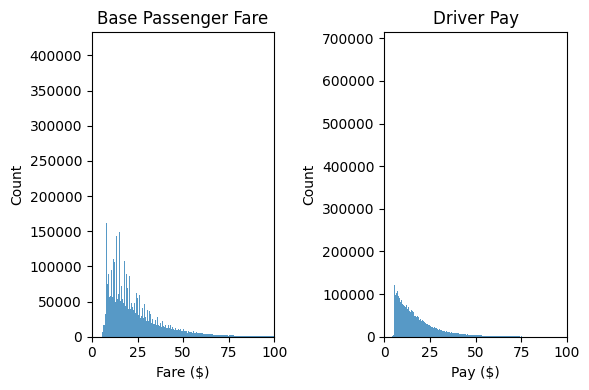

In [6]:
# 1a. Plot the distribution of the base passenger fare and driver pay (limit to amounts less than $100)
fig, axs = plt.subplots(ncols=2, figsize=(6, 4))

sns.histplot(data=df, x="base_passenger_fare", ax=axs[0])
axs[0].set_xlim(0, 100)
axs[0].set_title("Base Passenger Fare")
axs[0].set_xlabel("Fare ($)")

sns.histplot(data=df, x="driver_pay", ax=axs[1])
axs[1].set_xlim(0, 100)
axs[1].set_title("Driver Pay")
axs[1].set_xlabel("Pay ($)")

fig.tight_layout()

### Notes

- The distribution of base passenger fare and driver pay are similar in shape.
- The base passenger fares and driver pays are less than $25 (not including tolls, taxes, and additional fees).
- Most of the trips are within the NYC region because the fares are low.

In [7]:
# Create a column putting fare and pay value in a bucket
bins = [0, 4.99, 9.99, 14.99, 19.99, 24.99, 29.99, 34.99, 39.99, 44.99, float('inf')]
labels = ["0-4.99", "5-9.99", "10-14.99", "15-19.99", "20-24.99", "25-29.99", "30-34.99", "35-39.99", "40-44.99", "45+"]

# Bins
df["fare_bin"] = pd.cut(df["base_passenger_fare"], bins=bins, labels=labels)
df["pay_bin"] = pd.cut(df["driver_pay"], bins=bins, labels=labels)

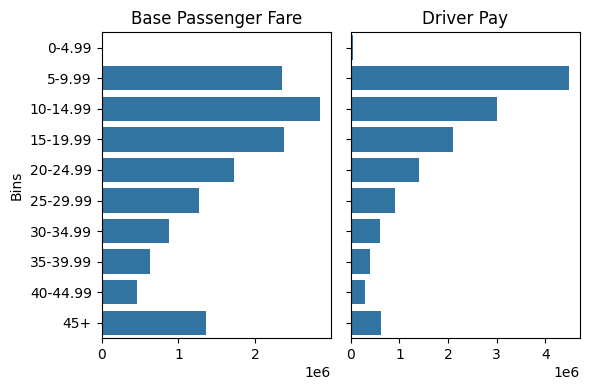

In [8]:
# 1b. Plot the bins of base passenger fare and driver pay amounts
fig, axs = plt.subplots(ncols=2, figsize=(6, 4), sharey=True)

fare_bins = df["fare_bin"]
pay_bins = df["pay_bin"]

sns.barplot(fare_bins.value_counts(), ax=axs[0], orient="h")
axs[0].set_title("Base Passenger Fare")
axs[0].set_xlabel("")
axs[0].set_ylabel("Bins")

sns.barplot(pay_bins.value_counts(), ax=axs[1], orient="h")
axs[1].set_title("Driver Pay")
axs[1].set_xlabel("")

fig.tight_layout()

### Notes

- Again, the majority of the base passenger fare and driver pay is below $25.
- The passengers are paying more per trip, and the driver is paid less.

In [9]:
# 1c. The average driver pay by pick up and drop off borough then sorted from dense trip totals and driver pay
df.groupby(["pu_borough", "do_borough"])[["driver_pay"]].agg(["count", np.mean])\
    .sort_values(by=[("driver_pay", "count"), ("driver_pay", "mean")], ascending=[False, False])

driver_pay      
                                 count  mean
pu_borough    do_borough                    
Manhattan     Manhattan        4251397 14.77
Brooklyn      Brooklyn         2779433 12.54
Queens        Queens           1834028 12.90
Bronx         Bronx            1304284 11.41
Manhattan     Queens            560989 36.98
              Brooklyn          499683 26.97
Brooklyn      Manhattan         443261 26.83
Queens        Manhattan         435145 35.50
Brooklyn      Queens            382805 27.76
Queens        Brooklyn          328506 26.71
Manhattan     Bronx             300244 21.25
Bronx         Manhattan         279661 21.03
Staten Island Staten Island     167109 11.82
Manhattan     EWR                89159 52.91
Bronx         Queens             62192 32.93
Queens        Bronx              54720 32.84
Brooklyn      Bronx              21610 46.78
Bronx         Brooklyn           20062 46.86
Brooklyn      Staten Island      13679 32.59
Staten Island Brooklyn           13159 32.02
Brooklyn      EWR                11905 58.48
Manhattan     Staten Island       8625 52.66
Staten Island Manhattan           5429 53.70
Queens        EWR                 3459 75.18
Staten Island EWR                 2958 38.70
Queens        Staten Island       2514 62.68
Staten Island Queens              2474 63.87
Bronx         EWR                 1365 68.43
              Staten Island        458 72.27
Staten Island Bronx                430 73.28

### Notes

- Most of the trips are within the boroughs, and the highest average pay for drivers is Manhattan followed by Queens.
- Manhattan to Queens is a popular pick-up to drop-off route with a average pay above $35.
- The Bronx has the lowest average pay ($11.41) to drivers.
- Staten Island is not a popular pick up spot, however, the average driver pay to travel to other boroughs is normally high.

In [10]:
# 1d. The top 5 popular drop off locations with the total number of trips and the average driver pay
df.groupby(["pu_borough", "do_borough", "do_zone"])["driver_pay"]\
  .agg(count='count', mean='mean')\
  .groupby(level=0, group_keys=False)\
  .apply(lambda g: g.sort_values(by=["count", "mean"], ascending=[False, False]).head(5))

count  mean
pu_borough    do_borough    do_zone                                  
Bronx         Bronx         Soundview/Castle Hill         54854 11.55
                            Bedford Park                  51868 10.98
                            Mott Haven/Port Morris        49505 12.80
                            Mount Hope                    49466 10.99
                            Williamsbridge/Olinville      49279 11.59
Brooklyn      Brooklyn      Crown Heights North          153983 12.07
                            East New York                121368 11.81
                            Bushwick South               104123 12.64
                            Flatbush/Ditmas Park          98219 12.96
                            Park Slope                    94416 13.24
Manhattan     Queens        LaGuardia Airport            182024 34.13
              Manhattan     Midtown Center               148146 15.60
                            West Chelsea/Hudson Yards    135085 14.72
                            East Village                 134964 13.72
                            Times Sq/Theatre District    133982 15.92
Queens        Queens        JFK Airport                   94629 21.34
                            Jamaica                       88857 11.88
                            Astoria                       88108 11.31
                            Jackson Heights               80260 11.15
                            Elmhurst                      78887 11.30
Staten Island Staten Island Saint George/New Brighton     25936 11.11
                            Bloomfield/Emerson Hill       19388 12.80
                            Heartland Village/Todt Hill   13238 12.83
                            Mariners Harbor               12654 10.99
                            Stapleton                     12499 10.99

### Notes

- Queens is a popular drop-off location for airport passengers such as LaGuardia (182024 trips) followed by JFK (94629 trips) airport.
- The average driver pay is higher in Manhattan.
- Manhattan and then Brooklyn are the popular drop-off boroughs in NYC, meaning people generally travel to these places.

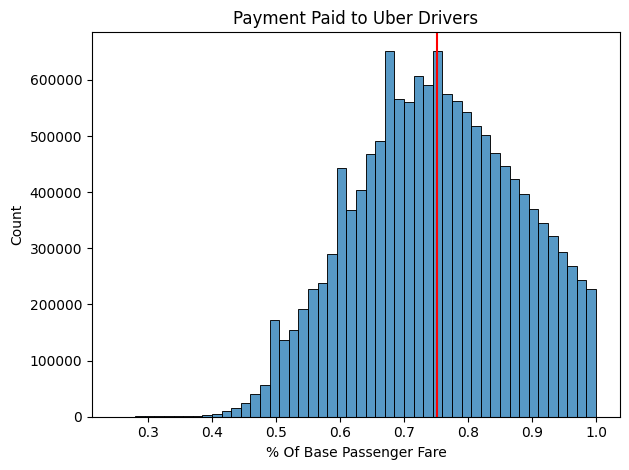

In [21]:
# The percentage of the base fare Uber drivers keep in NYC
sns.histplot(data=df, x="perct_of_base_fare", bins=50)
plt.axvline(df["perct_of_base_fare"].mean(), c="r")
plt.title("Payment Paid to Uber Drivers")
plt.xlabel("% Of Base Passenger Fare")
plt.tight_layout()

### Notes

- Around 75% of the base passenger fare is paid to drivers
- The distribution is left skewed